In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load the data file into a DataFrame.
df= pd.read_csv(r'C:\Users\nickm\Documents\senators.csv')

In [3]:
df.head(10)

,created_at,text,url,replies,retweets,favorites,user,bioguide_id,party,state
0,10/19/2017 21:47,We released bipartisan healthcare bill today a...,https://twitter.com/amyklobuchar/status/921130...,21,129,533,amyklobuchar,K000367,D,MN
1,10/19/2017 18:48,I spoke with MorningJoe team abt HonestAds bil...,https://twitter.com/amyklobuchar/status/921085...,8,46,150,amyklobuchar,K000367,D,MN
2,10/19/2017 18:14,Lots of interest in my bill with Senators Warn...,https://twitter.com/amyklobuchar/status/921077...,36,227,932,amyklobuchar,K000367,D,MN
3,10/19/2017 18:04,Todays the day MarkWarner SenJohnMcCain amp I ...,https://twitter.com/amyklobuchar/status/921074...,17,167,550,amyklobuchar,K000367,D,MN
4,10/19/2017 16:33,MarkWarner SenJohnMcCain amp I put together Ho...,https://twitter.com/amyklobuchar/status/921051...,31,279,893,amyklobuchar,K000367,D,MN
5,10/19/2017 15:14,Great chat w chrislhayes about Sessions hearin...,https://twitter.com/amyklobuchar/status/921031...,9,37,221,amyklobuchar,K000367,D,MN
6,10/18/2017 23:23,Happy to announce SenJohnMcCain has joined our...,https://twitter.com/amyklobuchar/status/920792...,72,834,3800,amyklobuchar,K000367,D,MN
7,10/18/2017 21:44,Fed judges in MD amp HI halted the Admins late...,https://twitter.com/amyklobuchar/status/920767...,15,88,361,amyklobuchar,K000367,D,MN
8,10/18/2017 17:38,It was good to hear that AG Sessions is willin...,https://twitter.com/amyklobuchar/status/920705...,31,46,224,amyklobuchar,K000367,D,MN
9,10/18/2017 17:08,President called investigation into Russias me...,https://twitter.com/amyklobuchar/status/920698...,77,160,864,amyklobuchar,K000367,D,MN


# Feature Dropping 

For this project I will be dropping a few features from the original dataset. 
These features are either irrelevant to the model I am attempting to build out or will create noise and possibly skew the model results. 

The features I removed were created_at, url, user, bioguide_id. The created_at time stamp is removed because I will not be doing a timeseries analysis and data/time has no impact on predicting the target variable. The url and bioguide_id are other irrelevant or non-impactful features and were removed. User is a feature that I was not sure if I should remove or not. I figured this would give an unfair boost to the model's predictive capability. I want the model to predict the target based only on the twitter text. 

In [5]:
twitter_df = df[['text', 'replies', 'retweets', 'favorites', 'party', 'state']]

In [6]:
twitter_df.head()

,text,replies,retweets,favorites,party,state
0,We released bipartisan healthcare bill today a...,21,129,533,D,MN
1,I spoke with MorningJoe team abt HonestAds bil...,8,46,150,D,MN
2,Lots of interest in my bill with Senators Warn...,36,227,932,D,MN
3,Todays the day MarkWarner SenJohnMcCain amp I ...,17,167,550,D,MN
4,MarkWarner SenJohnMcCain amp I put together Ho...,31,279,893,D,MN


One aspect of the target variable (party) that I decided to remove is the rows associated to the Independent party (I). This party type makes up such a small amount of the data that I believe it could create noise and hinder model performance. I may end up adding them back to compare results but I would like to make the first pass without the Independent party data. 

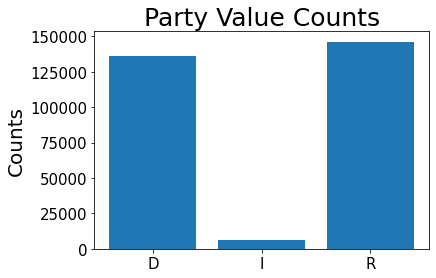

In [10]:
X_Party = twitter_df.groupby('party').size().reset_index(name='Counts')['party']
Y_Party = twitter_df.groupby('party').size().reset_index(name='Counts')['Counts']

plt.bar(X_Party, Y_Party)
plt.title('Party Value Counts', fontsize=25)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

In [17]:
(twitter_df['party'] !=  'I')

0         True
1         True
2         True
3         True
4         True
          ... 
288610    True
288611    True
288612    True
288613    True
288614    True
Name: party, Length: 288615, dtype: bool

In [18]:
twitter_df.shape

(288615, 6)

In [32]:
twitter_df2 = twitter_df[(twitter_df['party'] !=  'I')]

In [34]:
twitter_df2.shape

(282360, 6)

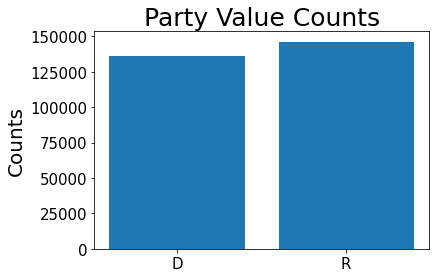

In [35]:
X_Party = twitter_df2.groupby('party').size().reset_index(name='Counts')['party']
Y_Party = twitter_df2.groupby('party').size().reset_index(name='Counts')['Counts']

plt.bar(X_Party, Y_Party)
plt.title('Party Value Counts', fontsize=25)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()